# <font color='red'> Auto-insurance project  </font> 

## Data Collection and Problem Statement

In [46]:
# install some librairies 
#pip install xgboost

In [47]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Import required libraries for machine learning classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb

# Import required libraries for performance metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report


# Import required libraries for preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Import required libraries for machine learning classifiers for imbalanced learn
from imblearn.ensemble import BalancedRandomForestClassifier 

In [48]:
# reading data
df_train=pd.read_csv('train_auto.csv')

In [49]:
# shape of data
df_train.shape

(8161, 26)

In [50]:
# look at a few rows of the dataframe 
pd.set_option('display.max_columns', None)
df_train.head(6)

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",Yes,z_F,PhD,Doctor,36,Private,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban
5,7,1,2946.0,0,34.0,1,12.0,"$125,301",Yes,$0,z_No,z_F,Bachelors,z_Blue Collar,46,Commercial,"$17,430",1,Sports Car,no,$0,0,No,0,7.0,Highly Urban/ Urban


### <font color='green'> Problem Statement : </font> 
In this project, we will explore and analyze and model a data that countains about 8000 rows. 
The target variable is 'TARGET_FLAG' which is a categorical variable that has two possible values '0' or '1'. '1' Means that 
the person was in a car crash, and '0' means that the person was not in a car crash. 
This is a classification problem that aims to predict if a person will crash its car or not. 

## Exploratory Data Analysis

In [51]:
# Remove duplicates if any
df_train = df_train.drop_duplicates()

# Shuffle the dataframe
df_train = df_train.sample(frac = 1)

In [52]:
# drop columns INDEX and TARGET_AMT 
df_train=df_train.drop(['INDEX'],axis=1)  #The variable INDEX is an identification variable, we will delete it. 
df_train=df_train.drop(['TARGET_AMT'],axis=1) # The variable TARGET_AMT is a second target value, highly correlated to 
                                               #TARGET_FLAG, we will drop it. 

In [53]:
# check if data is balanced
df_train['TARGET_FLAG'].value_counts()

0    6008
1    2153
Name: TARGET_FLAG, dtype: int64

(array([6008.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2153.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

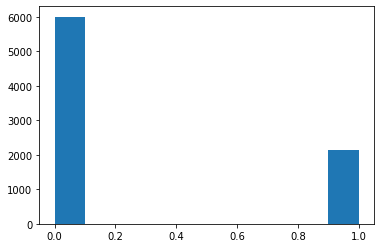

In [54]:
plt.hist(df_train['TARGET_FLAG'])

The data is imbalanced.

In [55]:
# summary statistics of quantitative variables
df_train.describe()

,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE
count,8161.000000,8161.000000,8155.000000,8161.000000,7707.000000,8161.000000,8161.000000,8161.000000,8161.000000,7651.000000
mean,0.263816,0.171057,44.790313,0.721235,10.499286,33.485725,5.351305,0.798554,1.695503,8.328323
std,0.440728,0.511534,8.627589,1.116323,4.092474,15.908333,4.146635,1.158453,2.147112,5.700742
min,0.000000,0.000000,16.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,-3.000000
25%,0.000000,0.000000,39.000000,0.000000,9.000000,22.000000,1.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,45.000000,0.000000,11.000000,33.000000,4.000000,0.000000,1.000000,8.000000
75%,1.000000,0.000000,51.000000,1.000000,13.000000,44.000000,7.000000,2.000000,3.000000,12.000000
max,1.000000,4.000000,81.000000,5.000000,23.000000,142.000000,25.000000,5.000000,13.000000,28.000000


In [56]:
# Check for data type of columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8161 entries, 6253 to 5392
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TARGET_FLAG  8161 non-null   int64  
 1   KIDSDRIV     8161 non-null   int64  
 2   AGE          8155 non-null   float64
 3   HOMEKIDS     8161 non-null   int64  
 4   YOJ          7707 non-null   float64
 5   INCOME       7716 non-null   object 
 6   PARENT1      8161 non-null   object 
 7   HOME_VAL     7697 non-null   object 
 8   MSTATUS      8161 non-null   object 
 9   SEX          8161 non-null   object 
 10  EDUCATION    8161 non-null   object 
 11  JOB          7635 non-null   object 
 12  TRAVTIME     8161 non-null   int64  
 13  CAR_USE      8161 non-null   object 
 14  BLUEBOOK     8161 non-null   object 
 15  TIF          8161 non-null   int64  
 16  CAR_TYPE     8161 non-null   object 
 17  RED_CAR      8161 non-null   object 
 18  OLDCLAIM     8161 non-null   object 
 19  CLM

There are 8161 instances and 26 variables in the dataset. The variables 'AGE', 'YOJ', 'INCOME', 'HOME_VAL', 'JOB' and 'CAR_AGE' have **missing values**. We will fix this in **cleaning phase**. 

The attributes 'AGE', 'YOJ', 'CAR_AGE' are numerical. 
The attributes 'INCOME', 'HOME_VAL', 'BLUEBOOK' and 'OLDCLAIM' are objects. **They should be converted to numerical**.

Let's now look at the types of the remaining attributes. 

In [57]:
# categorical columns
columns_cat=['PARENT1', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'CAR_USE', 'CAR_TYPE', 'RED_CAR','REVOKED', 'URBANICITY']

In [58]:
# Look for the category distribution in categorical columns
for col in columns_cat:
    print(df_train[col].value_counts())

No     7084
Yes    1077
Name: PARENT1, dtype: int64
Yes     4894
z_No    3267
Name: MSTATUS, dtype: int64
z_F    4375
M      3786
Name: SEX, dtype: int64
z_High School    2330
Bachelors        2242
Masters          1658
<High School     1203
PhD               728
Name: EDUCATION, dtype: int64
z_Blue Collar    1825
Clerical         1271
Professional     1117
Manager           988
Lawyer            835
Student           712
Home Maker        641
Doctor            246
Name: JOB, dtype: int64
Private       5132
Commercial    3029
Name: CAR_USE, dtype: int64
z_SUV          2294
Minivan        2145
Pickup         1389
Sports Car      907
Van             750
Panel Truck     676
Name: CAR_TYPE, dtype: int64
no     5783
yes    2378
Name: RED_CAR, dtype: int64
No     7161
Yes    1000
Name: REVOKED, dtype: int64
Highly Urban/ Urban      6492
z_Highly Rural/ Rural    1669
Name: URBANICITY, dtype: int64


The attributes in columns_cat are categorical. 

In [59]:
# convert 'INCOME', 'HOME_VAL', 'BLUEBOOK' and 'OLDCLAIM' variables to float 
df_train['INCOME']=pd.to_numeric(df_train['INCOME'].replace('[^0-9\.-]','',regex= True))
df_train['HOME_VAL']=pd.to_numeric(df_train['HOME_VAL'].replace('[^0-9\.-]','',regex= True))
df_train['BLUEBOOK']=pd.to_numeric(df_train['BLUEBOOK'].replace('[^0-9\.-]','',regex= True))
df_train['OLDCLAIM']=pd.to_numeric(df_train['OLDCLAIM'].replace('[^0-9\.-]','',regex= True))

In [60]:
# look at a few rows of the dataframe again
df_train.head()

,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
6253,0,0,34.0,1,12.0,11047.0,No,127167.0,Yes,z_F,<High School,Clerical,13,Private,6000,7,z_SUV,no,0,0,No,0,7.0,z_Highly Rural/ Rural
6892,0,0,42.0,0,6.0,48834.0,No,194280.0,Yes,M,z_High School,Clerical,37,Private,12720,14,Minivan,yes,0,0,No,0,1.0,z_Highly Rural/ Rural
200,0,0,45.0,0,NaN,19909.0,No,130331.0,Yes,z_F,<High School,Clerical,14,Private,7990,1,Sports Car,no,0,0,No,0,1.0,Highly Urban/ Urban
5001,0,0,61.0,0,13.0,41349.0,No,215205.0,Yes,z_F,z_High School,z_Blue Collar,56,Commercial,14460,9,Sports Car,no,0,0,No,0,3.0,z_Highly Rural/ Rural
2910,0,0,46.0,0,13.0,153458.0,No,0.0,z_No,M,PhD,NaN,39,Commercial,40980,11,Panel Truck,yes,16328,3,No,1,15.0,Highly Urban/ Urban


In [61]:
# check the variables conversion
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8161 entries, 6253 to 5392
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TARGET_FLAG  8161 non-null   int64  
 1   KIDSDRIV     8161 non-null   int64  
 2   AGE          8155 non-null   float64
 3   HOMEKIDS     8161 non-null   int64  
 4   YOJ          7707 non-null   float64
 5   INCOME       7716 non-null   float64
 6   PARENT1      8161 non-null   object 
 7   HOME_VAL     7697 non-null   float64
 8   MSTATUS      8161 non-null   object 
 9   SEX          8161 non-null   object 
 10  EDUCATION    8161 non-null   object 
 11  JOB          7635 non-null   object 
 12  TRAVTIME     8161 non-null   int64  
 13  CAR_USE      8161 non-null   object 
 14  BLUEBOOK     8161 non-null   int64  
 15  TIF          8161 non-null   int64  
 16  CAR_TYPE     8161 non-null   object 
 17  RED_CAR      8161 non-null   object 
 18  OLDCLAIM     8161 non-null   int64  
 19  CLM

In [62]:

df_train.describe()

,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE
count,8161.000000,8161.000000,8155.000000,8161.000000,7707.000000,7716.000000,7697.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,7651.000000
mean,0.263816,0.171057,44.790313,0.721235,10.499286,61898.094609,154867.289723,33.485725,15709.899522,5.351305,4037.076216,0.798554,1.695503,8.328323
std,0.440728,0.511534,8.627589,1.116323,4.092474,47572.682808,129123.774574,15.908333,8419.734075,4.146635,8777.139104,1.158453,2.147112,5.700742
min,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,-3.000000
25%,0.000000,0.000000,39.000000,0.000000,9.000000,28097.000000,0.000000,22.000000,9280.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,45.000000,0.000000,11.000000,54028.000000,161160.000000,33.000000,14440.000000,4.000000,0.000000,0.000000,1.000000,8.000000
75%,1.000000,0.000000,51.000000,1.000000,13.000000,85986.000000,238724.000000,44.000000,20850.000000,7.000000,4636.000000,2.000000,3.000000,12.000000
max,1.000000,4.000000,81.000000,5.000000,23.000000,367030.000000,885282.000000,142.000000,69740.000000,25.000000,57037.000000,5.000000,13.000000,28.000000


'CAR_AGE' has a negative minimum. The age should be positive. 

In [63]:
# negative car age 
df_train[df_train['CAR_AGE'] < 0] = 0

In [64]:
df_train=df_train.drop(df_train[df_train['EDUCATION']==0].index)

In [65]:
# Check for missing values
df_train.isna().sum().sort_values(ascending=False)

JOB            526
CAR_AGE        510
HOME_VAL       464
YOJ            454
INCOME         445
AGE              6
KIDSDRIV         0
HOMEKIDS         0
PARENT1          0
MSTATUS          0
SEX              0
EDUCATION        0
URBANICITY       0
TRAVTIME         0
CAR_USE          0
BLUEBOOK         0
TIF              0
CAR_TYPE         0
RED_CAR          0
OLDCLAIM         0
CLM_FREQ         0
REVOKED          0
MVR_PTS          0
TARGET_FLAG      0
dtype: int64

In [66]:
# 'JOB' variable
df_train['JOB'] = df_train['JOB'].fillna('unknown')

count    8154.000000
mean       44.790042
std         8.628084
min        16.000000
25%        39.000000
50%        45.000000
75%        51.000000
max        81.000000
Name: AGE, dtype: float64

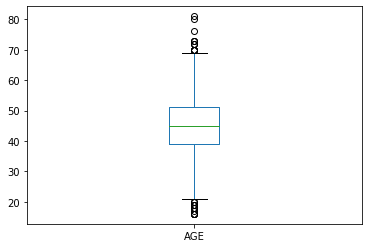

In [67]:
# 'AGE' variable
df_train['AGE'].plot(kind='box')
df_train['AGE'].describe()

The distribution is non-skewed, we can then fill missing values with the mean value

In [68]:
df_train['AGE']=df_train['AGE'].fillna(df_train['AGE'].mean())

count      7715.000000
mean      61899.805833
std       47575.528746
min           0.000000
25%       28094.000000
50%       54028.000000
75%       86021.000000
max      367030.000000
Name: INCOME, dtype: float64

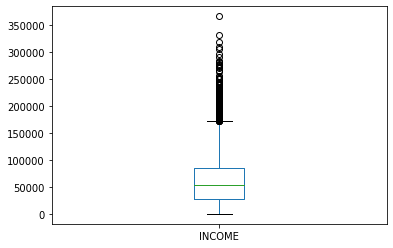

In [69]:
# 'INCOME' variable
df_train['INCOME'].plot(kind='box')
df_train['INCOME'].describe()

The distribution shows a skeweness, the median is quite different from the average which is affected by outliers. we will fill missing values with the median

In [70]:
df_train['INCOME']=df_train['INCOME'].fillna(df_train['INCOME'].median())

In [71]:
# other variables
df_train['CAR_AGE']=df_train['CAR_AGE'].fillna(df_train['CAR_AGE'].mean())
df_train['HOME_VAL']=df_train['HOME_VAL'].fillna(df_train['HOME_VAL'].median())
df_train['YOJ']=df_train['YOJ'].fillna(df_train['YOJ'].mean())

In [72]:
# correlation matrix
corr_df=df_train.corr('spearman')

In [73]:
corr_df

,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE
TARGET_FLAG,1.000000,0.104776,-0.104951,0.126882,-0.055658,-0.146667,-0.181825,0.056424,-0.114521,-0.084576,0.232915,0.236415,0.193504,-0.098164
KIDSDRIV,0.104776,1.000000,-0.128594,0.491098,0.071600,-0.046687,-0.021911,0.001628,-0.020391,-0.009839,0.044097,0.045185,0.043483,-0.049171
AGE,-0.104951,-0.128594,1.000000,-0.515892,0.136874,0.176238,0.199788,0.006956,0.165052,-0.001629,-0.038546,-0.033822,-0.062706,0.174690
HOMEKIDS,0.126882,0.491098,-0.515892,1.000000,0.134520,-0.165428,-0.114058,-0.012567,-0.116389,0.005429,0.052385,0.046074,0.055219,-0.155972
YOJ,-0.055658,0.071600,0.136874,0.134520,1.000000,0.195235,0.222467,-0.004230,0.089356,0.014445,-0.011012,-0.018947,-0.026827,0.035146
INCOME,-0.146667,-0.046687,0.176238,-0.165428,0.195235,1.000000,0.535700,-0.038142,0.396033,0.002630,-0.058188,-0.052061,-0.045067,0.408759
HOME_VAL,-0.181825,-0.021911,0.199788,-0.114058,0.222467,0.535700,1.000000,-0.028927,0.232625,0.003163,-0.101416,-0.099030,-0.058348,0.209343
TRAVTIME,0.056424,0.001628,0.006956,-0.012567,-0.004230,-0.038142,-0.028927,1.000000,-0.011338,-0.007833,-0.001266,0.007940,0.008533,-0.035218
BLUEBOOK,-0.114521,-0.020391,0.165052,-0.116389,0.089356,0.396033,0.232625,-0.011338,1.000000,0.001104,-0.040271,-0.041896,-0.036156,0.186976
TIF,-0.084576,-0.009839,-0.001629,0.005429,0.014445,0.002630,0.003163,-0.007833,0.001104,1.000000,-0.028101,-0.023935,-0.041769,-0.001557


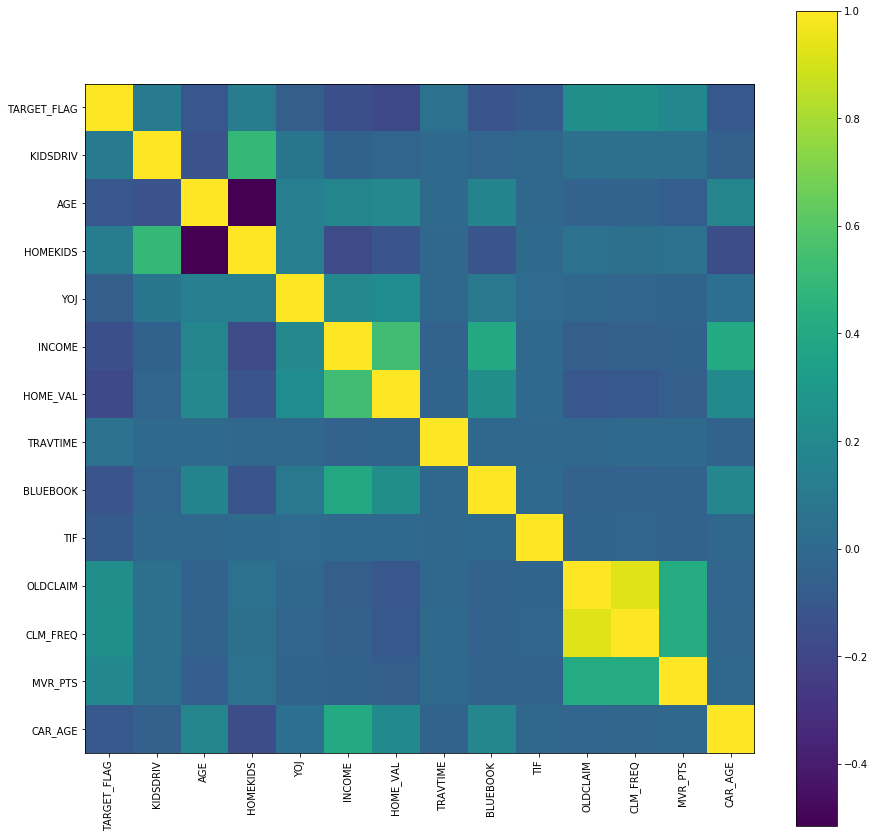

In [74]:
f = plt.figure(figsize=(15, 15))
plt.imshow(corr_df)
plt.colorbar()
plt.xticks(range(len(corr_df.columns)), corr_df.columns, rotation=90)
_ = plt.yticks(range(len(corr_df.columns)), corr_df.columns)

**'TARGET_FLAG' is positively correlated with 'OLDCLAIM', 'CLM_FREQ' and 'MVR_PTS'.**

-'OLDCLAIM' is the total claims in the past 5 years. That means that when a person has a high total payout 
over past five years, it is very likely to have a car crash.

-'OLDCLAIM' and 'CLM_FREQ' are highly correlated. 

-'MVR_PTS' means the motor vehicle record points. The correlation shows that a driver with lots of traffic tickets tend to 
get into more crashes.

**'TARGET_FLAG' is negatively correlated with 'AGE', 'HOME_VAL','INCOME'.**

This means that:

-Very young people are more risky.

-People who have high home value (home owners) tend to drive more responsibly.

-Rich people have less crashes







In [75]:
#numerical variables
numeric_variables = ['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ','INCOME','HOME_VAL','TRAVTIME','BLUEBOOK','TIF'
                    ,'OLDCLAIM','CLM_FREQ','MVR_PTS','CAR_AGE']

In [76]:
#categorical variables
categorical_variables = [
        'PARENT1', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB',
        'CAR_USE', 'CAR_TYPE', 'RED_CAR',
        'REVOKED', 'URBANICITY']

In [77]:
# separate independant variables and dependant variable
X = df_train.drop('TARGET_FLAG', axis=1)
y = df_train['TARGET_FLAG']

## Data preprocessing and Modeling

Since it is a classification problem, I chose to train without and then with PCA the following models:
    
-Logistic Regression

-Support Vector Classifier

-Decision Tree

-Random Forest

-Gaussian Naive Bayes

-XGBOOST

-AdaBoost

For Decision Tree Classifier and Ada Boost Classifier classifiers, I used Grid-search to find the optimal hyperparameters.
                                                                      
I will keep the model with the best value of metric for the test phase. Concerning the metric, I choose the F1-score.
Because at the same time, I am interested in having a good recall and precision. Indeed, I want to predict high number of car crashes among actual car crashes (this is the recall), and then when I predict that a person will 
have a car crash, I want to be right (this is the precision).

In [78]:
np.random.seed(0)

# Setting up Data Transformation Pipeline for numerical and categorical attributes:
#One-hot encoding for categorical attributes.
#Imputing Missing Values — using the SimpleImputer class.
#Standard Scaling of each Attribute — using the standardScaler class.



numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_variables),
        ('cat', categorical_transformer, categorical_variables)])

In [79]:
def score_classifier(dataset,classifier,labels):

    """
    performs 3 random trainings/tests to build a confusion matrix and prints results with precision and recall scores
    :param dataset: the dataset to work on
    :param classifier: the classifier to use
    :param labels: the labels used for training and validation
    :return:
    """
    pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", classifier)])

    kf = KFold(n_splits=3,random_state=50,shuffle=True)
    confusion_mat = np.zeros((2,2))
    acc = 0 
    recall = 0
    precision = 0
    f1 = 0 

    for training_ids,test_ids in kf.split(dataset):
        
        training_set = dataset.iloc[training_ids]
        training_labels = labels.iloc[training_ids]
        test_set = dataset.iloc[test_ids]
        test_labels = labels.iloc[test_ids]
        pipeline.fit(training_set,training_labels)
        predicted_labels = pipeline.predict(test_set)
        confusion_mat+=confusion_matrix(test_labels,predicted_labels)
        recall += recall_score(test_labels, predicted_labels)
        precision += precision_score(test_labels, predicted_labels)
        f1 += f1_score(test_labels, predicted_labels)
        acc += accuracy_score(test_labels,predicted_labels)

    acc /= 3
    recall/=3
    precision /=3
    f1 /= 3
    return {'test_accuracy':acc,'test_precision': precision,'test_recall':recall,'test_f1_score':f1}



## Instantiate the machine learning classifiers

In [80]:

log_model = LogisticRegression(max_iter=10000)
svc_model = LinearSVC(dual=False)
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
gnb_model = GaussianNB()
xgb_model = xgb.XGBClassifier()
adb_model = AdaBoostClassifier()

## Grid Search of Best HyperParameters for some classifiers

In [81]:
X_grid_search = preprocessor.fit_transform(X)

In [82]:
### Grid Search for DecisionTreeClassifier
param_test = {
  'splitter' :['best', 'random'],
   'min_samples_split':[2,3,4],

 }
gsearch = GridSearchCV(estimator = DecisionTreeClassifier(),
                        param_grid = param_test, cv=5,verbose=1)
gsearch.fit(X_grid_search,y)
splitter = gsearch.best_params_['splitter']
min_samples_split = gsearch.best_params_['min_samples_split']


Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [83]:
print('splitter '+str(splitter))
print('min_samples_split '+str(min_samples_split))

dtr_model = DecisionTreeClassifier(splitter=splitter,min_samples_split=min_samples_split)

splitter random
min_samples_split 3


In [84]:
### Grid Search for AdaBoostClassifier
param_test = {
  'n_estimators':[50,100,200,300],
   'learning_rate':[0.1,0.5,1]
 }
gsearch = GridSearchCV(estimator = AdaBoostClassifier(),
                        param_grid = param_test, cv=5,verbose=1)
gsearch.fit(X_grid_search,y)
n_estimators = gsearch.best_params_['n_estimators']
learning_rate = gsearch.best_params_['learning_rate']


Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [85]:
print('n_estimators '+str(n_estimators))
print('learning_rate '+str(learning_rate))

adb_model = AdaBoostClassifier(n_estimators=n_estimators,learning_rate=learning_rate)


n_estimators 100
learning_rate 0.5


## Evaluation of different models

In [86]:
# Define the models evaluation function
def models_evaluation(X, y):
    
    '''
    X : data set features
    y : data set target
    
    '''
    
    # Perform cross-validation to each machine learning classifier
    log = score_classifier(X, log_model, y)
    svc = score_classifier(X, svc_model, y)
    dtr = score_classifier(X, dtr_model, y)
    rfc = score_classifier(X, rfc_model, y)
    gnb = score_classifier(X, gnb_model, y)
    gbc = score_classifier(X, xgb_model, y)
    adb = score_classifier(X, adb_model, y)
    # Create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'],
                                                               log['test_precision'],
                                                               log['test_recall'],
                                                               log['test_f1_score']],
                                       
                                      'Support Vector Classifier':[svc['test_accuracy'],
                                                                   svc['test_precision'],
                                                                   svc['test_recall'],
                                                                   svc['test_f1_score']],
                                       
                                      'Decision Tree':[dtr['test_accuracy'],
                                                       dtr['test_precision'],
                                                       dtr['test_recall'],
                                                       dtr['test_f1_score']],
                                       
                                      'Random Forest':[rfc['test_accuracy'],
                                                       rfc['test_precision'],
                                                       rfc['test_recall'],
                                                       rfc['test_f1_score']],
                                       
                                      'Gaussian Naive Bayes':[gnb['test_accuracy'],
                                                              gnb['test_precision'],
                                                              gnb['test_recall'],
                                                              gnb['test_f1_score']],
                                      'XGBOOST':[gbc['test_accuracy'],
                                                              gbc['test_precision'],
                                                              gbc['test_recall'],
                                                              gbc['test_f1_score']],
                                      'AdaBoost':[adb['test_accuracy'],
                                                              adb['test_precision'],
                                                              adb['test_recall'],
                                                              adb['test_f1_score']]},
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)
  
# Run models_evaluation function
models_evaluation(X, y)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:30:54] WARNING: /private/var/folders/9n/wjhmx_7s1cg4ywb7y1p_6cxw0000gn/T/pip-install-z573l4kp/xgboost/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:30:56] WARNING: /private/var/folders/9n/wjhmx_7s1cg4ywb7y1p_6cxw0000gn/T/pip-install-z573l4kp/xgboost/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:30:58] WARNING: /private/var/folders/9n/wjhmx_7s1cg4ywb7y1p_6cxw0000gn/T/pip-install-z573l4kp/xgboost/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Logistic Regression,Support Vector Classifier,Decision Tree,Random Forest,Gaussian Naive Bayes,XGBOOST,AdaBoost,Best Score
Accuracy,0.790564,0.789828,0.707108,0.788971,0.727328,0.782598,0.791422,AdaBoost
Precision,0.662504,0.672433,0.442225,0.677519,0.487700,0.618095,0.673692,Random Forest
Recall,0.419457,0.396367,0.423160,0.382400,0.678283,0.463127,0.407079,Gaussian Naive Bayes
F1 Score,0.513338,0.498409,0.432405,0.488448,0.567403,0.528883,0.506935,Gaussian Naive Bayes


## Evaluate different classifier by using principal componenents as input

In [87]:
pca = PCA(n_components=20, svd_solver='randomized',
                                whiten=True)
X_pca = pca.fit_transform(X_grid_search)

Text(0.5, 1.0, 'Cumulative sum of the explained variance ration as function of number of components ')

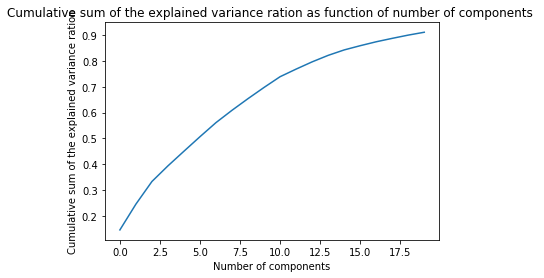

In [88]:
plt.plot(range(20),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative sum of the explained variance ration')
plt.title('Cumulative sum of the explained variance ration as function of number of components ')

We decide to use 10 components, because they explain more than 70% of the variance.

In [89]:
# classifiers with PCA
def score_classifier_with_pca(dataset,classifier,labels):

    """
    performs 3 random trainings/tests to build a confusion matrix and prints results with precision and recall scores
    :param dataset: the dataset to work on
    :param classifier: the classifier to use
    :param labels: the labels used for training and validation
    :return:
    """
    pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                               ('PCA',PCA(n_components=10, svd_solver='randomized',
                                whiten=True)) ,
                                ("classifier", classifier)])

    kf = KFold(n_splits=3,random_state=50,shuffle=True)
    confusion_mat = np.zeros((2,2))
    acc = 0 
    recall = 0
    precision = 0
    f1 = 0 

    for training_ids,test_ids in kf.split(dataset):
        training_set = dataset.iloc[training_ids]
        training_labels = labels.iloc[training_ids]
        test_set = dataset.iloc[test_ids]
        test_labels = labels.iloc[test_ids]
        pipeline.fit(training_set,training_labels)
        predicted_labels = pipeline.predict(test_set)
        confusion_mat+=confusion_matrix(test_labels,predicted_labels)
        recall += recall_score(test_labels, predicted_labels)
        precision += precision_score(test_labels, predicted_labels)
        f1 += f1_score(test_labels, predicted_labels)
        acc += accuracy_score(test_labels,predicted_labels)

    acc /= 3
    recall/=3
    precision /=3
    f1 /= 3
    return {'test_accuracy':acc,'test_precision': precision,'test_recall':recall,'test_f1_score':f1}


In [90]:
# Instantiate the machine learning classifiers
log_model = LogisticRegression(max_iter=10000)
svc_model = LinearSVC(dual=False)
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
gnb_model = GaussianNB()
xgb_model = xgb.XGBClassifier()
adb_model = AdaBoostClassifier()
# Define the models evaluation function
def models_evaluation_with_pca(X, y):
    
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds
    
    '''
    
    # Perform cross-validation to each machine learning classifier
    log = score_classifier_with_pca(X, log_model, y)
    svc = score_classifier_with_pca(X, svc_model, y)
    dtr = score_classifier_with_pca(X, dtr_model, y)
    rfc = score_classifier_with_pca(X, rfc_model, y)
    gnb = score_classifier_with_pca(X, gnb_model, y)
    gbc = score_classifier_with_pca(X, xgb_model, y)
    adb = score_classifier_with_pca(X, adb_model, y)
    # Create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'],
                                                               log['test_precision'],
                                                               log['test_recall'],
                                                               log['test_f1_score']],
                                       
                                      'Support Vector Classifier':[svc['test_accuracy'],
                                                                   svc['test_precision'],
                                                                   svc['test_recall'],
                                                                   svc['test_f1_score']],
                                       
                                      'Decision Tree':[dtr['test_accuracy'],
                                                       dtr['test_precision'],
                                                       dtr['test_recall'],
                                                       dtr['test_f1_score']],
                                       
                                      'Random Forest':[rfc['test_accuracy'],
                                                       rfc['test_precision'],
                                                       rfc['test_recall'],
                                                       rfc['test_f1_score']],
                                       
                                      'Gaussian Naive Bayes':[gnb['test_accuracy'],
                                                              gnb['test_precision'],
                                                              gnb['test_recall'],
                                                              gnb['test_f1_score']],
                                      'XGBOOST':[gbc['test_accuracy'],
                                                              gbc['test_precision'],
                                                              gbc['test_recall'],
                                                              gbc['test_f1_score']],
                                      'AdaBoost':[adb['test_accuracy'],
                                                              adb['test_precision'],
                                                              adb['test_recall'],
                                                              adb['test_f1_score']]},
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)


# Run models_evaluation function
models_evaluation_with_pca(X, y)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:31:08] WARNING: /private/var/folders/9n/wjhmx_7s1cg4ywb7y1p_6cxw0000gn/T/pip-install-z573l4kp/xgboost/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:31:09] WARNING: /private/var/folders/9n/wjhmx_7s1cg4ywb7y1p_6cxw0000gn/T/pip-install-z573l4kp/xgboost/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:31:11] WARNING: /private/var/folders/9n/wjhmx_7s1cg4ywb7y1p_6cxw0000gn/T/pip-install-z573l4kp/xgboost/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Logistic Regression,Support Vector Classifier,Decision Tree,Random Forest,Gaussian Naive Bayes,XGBOOST,AdaBoost,Best Score
Accuracy,0.747549,0.743873,0.672181,0.756618,0.735662,0.738235,0.746936,Random Forest
Precision,0.562472,0.552625,0.385584,0.581822,0.498589,0.506351,0.539605,Random Forest
Recall,0.197641,0.163641,0.406006,0.274895,0.256620,0.306254,0.280493,Decision Tree
F1 Score,0.292166,0.252086,0.395310,0.373304,0.338669,0.381246,0.368685,Decision Tree


 It is clear that using PCA does not improve our classifiers' performance, which could be explained by the fact that pca does not catch non-linearities between features.

The model AdaBoost gives the highest score. We will use it for the test data. 

## Test data 
    

In [91]:
#read test data
df_test=pd.read_csv('test_auto.csv')

In [92]:
#drop some columns
df_test=df_test.drop(['TARGET_FLAG'],axis=1)
df_test=df_test.drop(['TARGET_AMT'],axis=1)
df_test=df_test.drop(['INDEX'],axis=1)

In [93]:
# preprocessing function
def preprocess(df_train):
    
    df_train['INCOME']=pd.to_numeric(df_train['INCOME'].replace('[^0-9\.-]','',regex= True))
    df_train['HOME_VAL']=pd.to_numeric(df_train['HOME_VAL'].replace('[^0-9\.-]','',regex= True))
    df_train['BLUEBOOK']=pd.to_numeric(df_train['BLUEBOOK'].replace('[^0-9\.-]','',regex= True))
    df_train['OLDCLAIM']=pd.to_numeric(df_train['OLDCLAIM'].replace('[^0-9\.-]','',regex= True))
    
    df_train[df_train['CAR_AGE'] < 0] = 0
    
    df_train=df_train.drop(df_train[df_train['EDUCATION']==0].index)
       
    df_train['JOB'] = df_train['JOB'].fillna('unknown')
    df_train['AGE']=df_train['AGE'].fillna(df_train['AGE'].mean())
    df_train['INCOME']=df_train['INCOME'].fillna(df_train['INCOME'].median())
    df_train['CAR_AGE']=df_train['CAR_AGE'].fillna(df_train['CAR_AGE'].mean())
    df_train['HOME_VAL']=df_train['HOME_VAL'].fillna(df_train['HOME_VAL'].median())
    df_train['YOJ']=df_train['YOJ'].fillna(df_train['YOJ'].mean())
    
    
    
    return(df_train)
  

In [94]:
X_test = preprocess(df_test)

In [95]:
X_test.shape

(2141, 23)

In [96]:
#apply best model found in trainning phase
model = adb_model

In [97]:
X_train_processed = preprocessor.fit_transform(X)
model.fit(X_train_processed,y)

AdaBoostClassifier()

In [98]:
X_test_processed = preprocessor.transform(X_test)

In [99]:
#find the prediction
pred = model.predict(X_test_processed)

In [100]:
pred.sum()

398

In [101]:
X_test['TARGET_FLAG'] = pred

In [102]:
X_test.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY,TARGET_FLAG
0,0,48.0,0,11.000000,52881.0,No,0.0,z_No,M,Bachelors,Manager,26,Private,21970,1,Van,yes,0,0,No,2,10.0,Highly Urban/ Urban,0
1,1,40.0,1,11.000000,50815.0,Yes,0.0,z_No,M,z_High School,Manager,21,Private,18930,6,Minivan,no,3295,1,No,2,1.0,Highly Urban/ Urban,0
2,0,44.0,2,12.000000,43486.0,Yes,0.0,z_No,z_F,z_High School,z_Blue Collar,30,Commercial,5900,10,z_SUV,no,0,0,No,0,10.0,z_Highly Rural/ Rural,0
3,0,35.0,2,10.379091,21204.0,Yes,0.0,z_No,M,z_High School,Clerical,74,Private,9230,6,Pickup,no,0,0,Yes,0,4.0,z_Highly Rural/ Rural,0
4,0,59.0,0,12.000000,87460.0,No,0.0,z_No,M,z_High School,Manager,45,Private,15420,1,Minivan,yes,44857,2,No,4,1.0,Highly Urban/ Urban,0


(array([1743.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         398.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

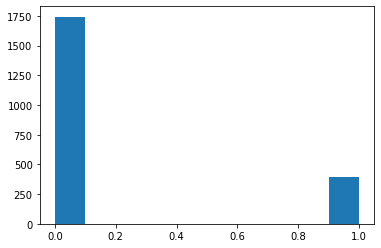

In [103]:
plt.hist(pred)

In [104]:
#generate csv file of predictions
X_test.to_csv('test_set_with_predictions.csv')